In [33]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind 
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency 
import seaborn as sns
import scipy.stats as stats

In [5]:
df = pd.read_csv("files/marketing_AB.csv", index_col=0)

df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


- Determinar si un nuevo diseño de anuncio (test group "ad") tiene un impacto significativo en la tasa de conversión en comparación con el diseño de anuncio anterior (test group "psa").

In [6]:
df.shape

(588101, 6)

In [7]:
df["test group"].unique()

array(['ad', 'psa'], dtype=object)

In [10]:
grupo_ad = df[df["test group"]== "ad"]
grupo_psa = df[df["test group"]== "psa"]

In [11]:
# Calculamos la tasa de conversión para el grupo "ad"
tasa_conversion_ad = grupo_ad["converted"].sum() / len(grupo_ad) if len(grupo_ad) > 0 else 0

# Calculamos la tasa de conversión para el grupo "psa"
tasa_conversion_psa = grupo_psa["converted"].sum() / len(grupo_psa) if len(grupo_psa) > 0 else 0

# Mostramos los resultados
print(f"Tasa de conversión para el grupo 'ad': {tasa_conversion_ad:.2f}")
print(f"Tasa de conversión para el grupo 'psa': {tasa_conversion_psa:.2f}")


Tasa de conversión para el grupo 'ad': 0.03
Tasa de conversión para el grupo 'psa': 0.02


In [14]:
tabla_cont = pd.crosstab(df["test group"], df["converted"])
tabla_cont

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [17]:
_, p_value, _, _ =chi2_contingency(tabla_cont)

p_value

1.9989623063390075e-13

si p_value < 0.05 -> existe una diferencia significativa

si p_value > 0.05 -> no hay diferencia significativa

In [19]:
#existe una diferencia significativa
p_value < 0.05

True

## 2 EJERCICO

In [21]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [22]:
df.groupby("test group")["total ads"].mean()

test group
ad     24.823365
psa    24.761138
Name: total ads, dtype: float64

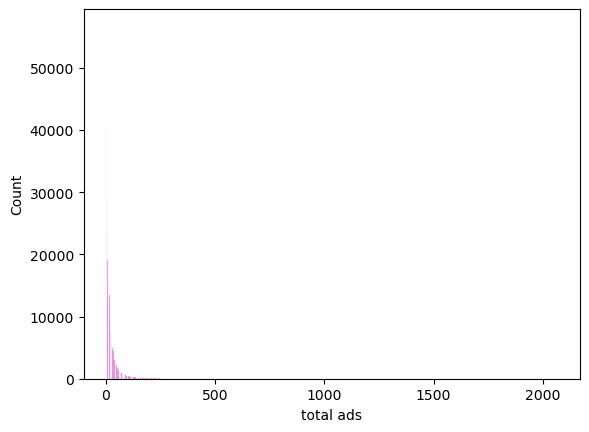

In [25]:
sns.histplot(x = "total ads", data = df, color = "violet");

In [26]:
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.
    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.
    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [28]:
normalidad(df,"total ads")

Para la columna total ads los datos no siguen una distribución normal.


c:\Users\irene\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 588101.
  res = hypotest_fun_out(*samples, **kwds)


In [41]:
grupo_ad = df[df["test group"]== "ad"]["total ads"]
grupo_psa = df[df["test group"]== "psa"]["total ads"]

In [39]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [44]:
_, p_value = mannwhitneyu(grupo_ad, grupo_psa)
 
p_value

4.6909108547205694e-11

In [46]:
#Si que existe una diferencia significativa
p_value < 0.05

True

si p_value < 0.05 -> existe una diferencia significativa

si p_value > 0.05 -> no hay diferencia significativa